# Part I 
# Loan Data from Prosper Data Exploration 
## by Bernard A. Buckman

## Introduction

> - This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
> - Read more about the data dictionary from this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0 

## Preliminary Wrangling


In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties

In [2]:
# Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Number of rows and columns 

df.shape

(113937, 81)

In [5]:
# Preview the first few rows 

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Check for duplicates

df.duplicated().sum()

0

In [7]:
# Check for empty values in all columns 

print(df.isnull().sum())

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64


### What is the structure of your dataset?

- The dataset has 113937 entries (rows) and 81 columns. 

### What are the main feature(s) of interest in your dataset?

- There are so many things to explore in this analysis. But my analysis will focus on those that help us understand the borrower APR (Annual Percentage Rate) and related information.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- For this analysis, I will leverage the following variables: loan status, borrower APR, borrower rate, original loan amount, stated monthly income, prosper score, borrower occupation, term, ListingCategory (numeric), is borrower a homeowner, listing creation date, employment status

### Data dictionary 

| Feature     |    Description                                                                        |
|-------------|---------------------------------------------------------------------------------------|
| ListingCreationDate | The date the listing was created. |
| CreditGrade | The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings. |
| LoanOriginalAmount | The origination amount of the loan. |
| Term        | The length of the loan expressed in months.                                           |
| LoanStatus | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.      |
| BorrowerAPR | The Borrower's Annual Percentage Rate (APR) for the loan.                             |
| BorrowerRate| The Borrower's interest rate for this loan. |
| ProsperScore | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. |
| ProsperRating (Alpha) | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. |
| Occupation | The Occupation selected by the Borrower at the time they created the listing. |
| EmploymentStatus | The employment status of the borrower at the time they posted the listing. | 
| IsBorrowerHomeowner | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. | 
| ListingCategory | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| StatedMonthlyIncome | The monthly income the borrower stated at the time the listing was created. |

### More data wrangling 

In [8]:
# Selecting features of interest from the dataset 

cols = ['ListingCreationDate','CreditGrade', 'LoanOriginalAmount','Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperScore','Occupation', 'EmploymentStatus','IsBorrowerHomeowner','StatedMonthlyIncome','ListingCategory (numeric)', 'ProsperRating (Alpha)']

df_loan = df[cols]

In [9]:
# visualise the selected columns of the dataset

df_loan.head()

,ListingCreationDate,CreditGrade,LoanOriginalAmount,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,ListingCategory (numeric),ProsperRating (Alpha)
0,2007-08-26 19:09:29.263000000,C,9425,36,Completed,0.16516,0.1580,NaN,Other,Self-employed,True,3083.333333,0,NaN
1,2014-02-27 08:28:07.900000000,NaN,10000,36,Current,0.12016,0.0920,7.0,Professional,Employed,False,6125.000000,2,A
2,2007-01-05 15:00:47.090000000,HR,3001,36,Completed,0.28269,0.2750,NaN,Other,Not available,False,2083.333333,0,NaN
3,2012-10-22 11:02:35.010000000,NaN,10000,36,Current,0.12528,0.0974,9.0,Skilled Labor,Employed,True,2875.000000,16,A
4,2013-09-14 18:38:39.097000000,NaN,15000,36,Current,0.24614,0.2085,4.0,Executive,Employed,True,9583.333333,2,D


In [10]:
# investigate the structure of dataset

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   CreditGrade                28953 non-null   object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   BorrowerAPR                113912 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   ProsperScore               84853 non-null   float64
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  StatedMonthlyIncome        113937 non-null  float64
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  ProsperRating (Alpha)      84

In [11]:
# Correcting data types 
# Transform the date column into datetime type

df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])

/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/2410824902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])


In [12]:
# Correcting data types 

alpha_values = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA']}
for values in alpha_values:
    ordered_values = pd.api.types.CategoricalDtype(ordered = True, categories = alpha_values[values])
    df_loan[values] = df_loan[values].astype(ordered_values)

/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/2111009749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[values] = df_loan[values].astype(ordered_values)


In [13]:
# Verify that the categories have been set

df_loan['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [14]:
# Correcting data types 
# Function to tranform the datatype of all categorical columns 

def toCat(col):
    df_loan[col] = df_loan[col].astype('category')

In [15]:
#Transform the datatype of all other categorical features

toCat('Occupation')
toCat('LoanStatus')
toCat('EmploymentStatus')

/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/1627216996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[col] = df_loan[col].astype('category')
/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/1627216996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan[col] = df_loan[col].astype('category')
/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/1627216996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [16]:
# Descriptive statistics 

df_loan.describe()

,LoanOriginalAmount,Term,BorrowerAPR,BorrowerRate,ProsperScore,StatedMonthlyIncome,ListingCategory (numeric)
count,113937.00000,113937.000000,113912.000000,113937.000000,84853.000000,1.139370e+05,113937.000000
mean,8337.01385,40.830248,0.218828,0.192764,5.950067,5.608026e+03,2.774209
std,6245.80058,10.436212,0.080364,0.074818,2.376501,7.478497e+03,3.996797
min,1000.00000,12.000000,0.006530,0.000000,1.000000,0.000000e+00,0.000000
25%,4000.00000,36.000000,0.156290,0.134000,4.000000,3.200333e+03,1.000000
50%,6500.00000,36.000000,0.209760,0.184000,6.000000,4.666667e+03,1.000000
75%,12000.00000,36.000000,0.283810,0.250000,8.000000,6.825000e+03,3.000000
max,35000.00000,60.000000,0.512290,0.497500,11.000000,1.750003e+06,20.000000


In [17]:
# Verify that everthing has been corrected 

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   CreditGrade                28953 non-null   object        
 2   LoanOriginalAmount         113937 non-null  int64         
 3   Term                       113937 non-null  int64         
 4   LoanStatus                 113937 non-null  category      
 5   BorrowerAPR                113912 non-null  float64       
 6   BorrowerRate               113937 non-null  float64       
 7   ProsperScore               84853 non-null   float64       
 8   Occupation                 110349 non-null  category      
 9   EmploymentStatus           111682 non-null  category      
 10  IsBorrowerHomeowner        113937 non-null  bool          
 11  StatedMonthlyIncome        113937 non-null  float64 

## Univariate Exploration

In [18]:
# set base color for plots 

base_color = sb.color_palette()[0]

### Loan Term

> What are the loan terms?

In [19]:
# Examine the number of distinct/unique loan terms 

df_loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

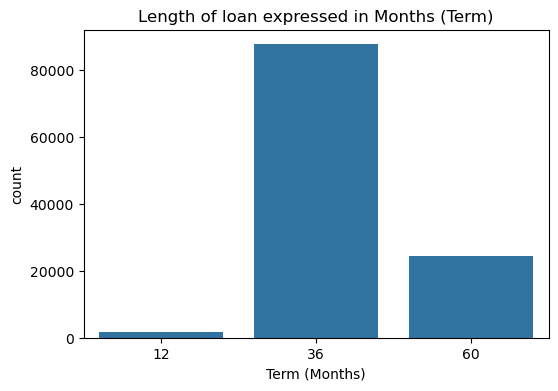

In [20]:
# plot the count of various loan terms 

plt.figure(figsize=[6, 4])
sb.countplot(data=df_loan,x= 'Term', color=base_color);
plt.title('Length of loan expressed in Months (Term)')
plt.xlabel('Term (Months)');

### Observation
From the plot the most polpular loan term was 36 months and the least popular term was 12 months

### Loan Amounts 
> What are the various amounts and corresponding number of people who took the loans?

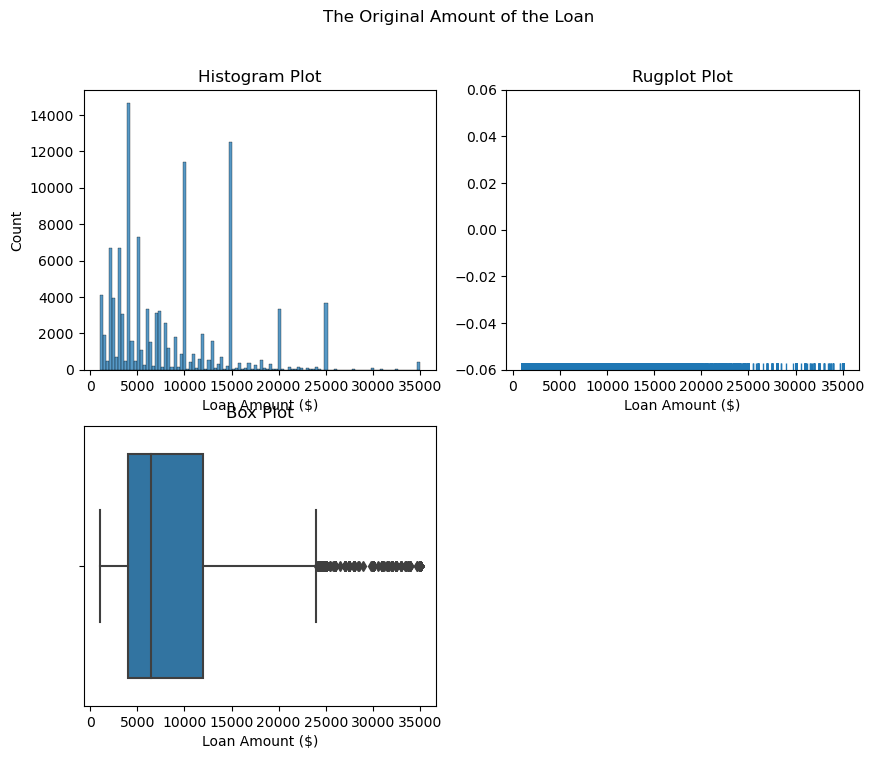

In [21]:
# plot the count of loan amounts

plt.figure(figsize=[10, 8])
plt.subplot(2,2,1)
sb.histplot(data=df_loan, x= 'LoanOriginalAmount', color=base_color)
plt.title('Histogram Plot')
plt.xlabel('Loan Amount ($)')

plt.subplot(2,2,2)
sb.rugplot(data=df_loan, x= 'LoanOriginalAmount', color=base_color)
plt.title('Rugplot Plot')
plt.xlabel('Loan Amount ($)')

plt.subplot(2,2,3)
sb.boxplot(x=df_loan['LoanOriginalAmount'])
plt.title('Box Plot')
plt.xlabel('Loan Amount ($)')

plt.suptitle('The Original Amount of the Loan')
plt.show();

### Observation
- From the figures, we can observe that most loans were below $25000$ (dollars). 
- The highest loan amount was $240000$ (dollars)
- Most of the loan amounts were between $49000$ to $12000$. The median amount was $6000$ (dollars)

### Prosper Loan Score (Alpha)
> What is the distribution of the various categories of scores? 

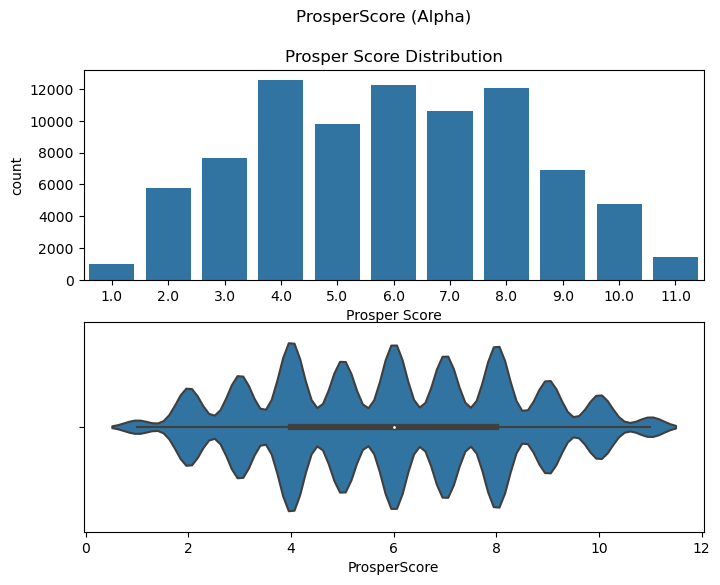

In [22]:
# Prosper Score Bar chart 

plt.figure(figsize=[8, 6])
plt.subplot(2,1,1)
sb.countplot(data=df_loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')

plt.subplot(2,1,2)
sb.violinplot(x=df_loan['ProsperScore'])

plt.suptitle('ProsperScore (Alpha)')
plt.show();

### Observation 
From the figure, the distribution shows categories 4, 5, 6, 7, and 8 have the highest count 

### Prosper Rate 
> What is the distribution of Prosper Rate?

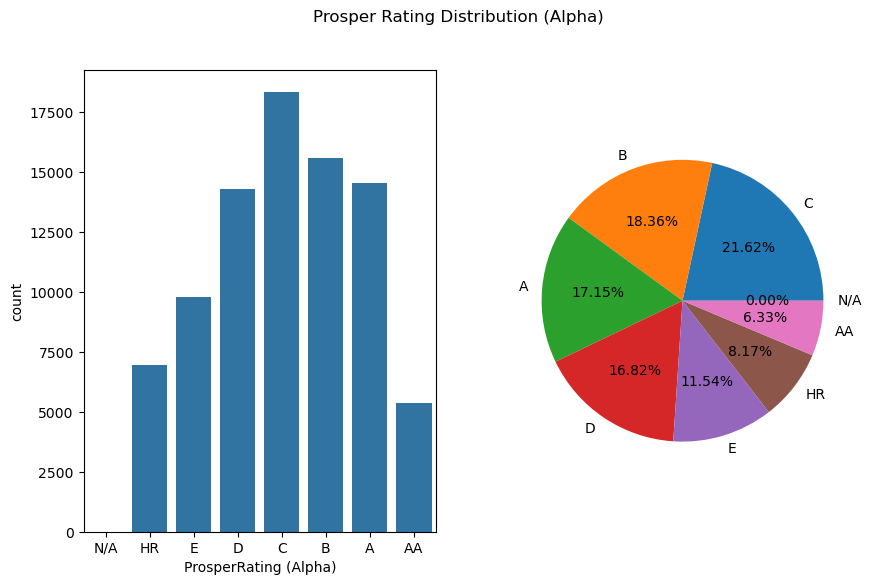

In [23]:
# Prosper Rating Distribution

cats = df_loan['ProsperRating (Alpha)'].value_counts()
labels = ['C', 'B', 'A', 'D', 'E', 'HR', 'AA', 'N/A']

plt.figure(figsize=[10, 6]);
plt.subplot(1, 2, 1)
sb.countplot(data=df_loan, x='ProsperRating (Alpha)',color=base_color)

plt.subplot(1, 2, 2)
plt.pie(cats, labels=labels, autopct="%.2f%%")

plt.suptitle('Prosper Rating Distribution (Alpha)')
plt.show();

### Observation 
From the figure, we can see that most patrons were categrized into C (22%). And the least being AA (6%) and N/A (0%)

### LoanStatus
> - What categories do most loans fall in?

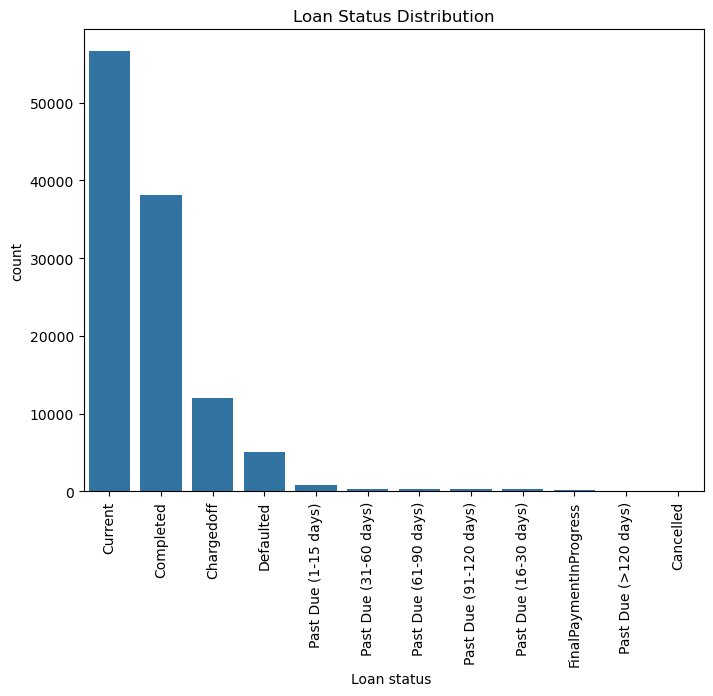

In [24]:
plt.figure(figsize=[8,6])
sb.countplot(data=df_loan, x='LoanStatus',order = df_loan['LoanStatus'].value_counts().index, color=base_color)
plt.xlabel('Loan status ')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution')
plt.show();

### Observation
We can see that most loans fall into current category. This is followed by loans in completed, charged off, defaulted, and so on.

In [25]:
# Function for quantitative features 

def allHistPlots(feature, interval, title):
    # set the bins for the interval 
    bins = np.arange(df_loan[feature].min(), df_loan[feature].max()+interval, interval)
    
    # plot the feature
    plt.figure(figsize=[8,6])
    sb.histplot(data=df_loan, x = feature, bins=bins, color=base_color)
    plt.title(title)
    plt.xlabel(feature.title())
    

### Borrower APR
> - What is the distribution of the borrower APR? 

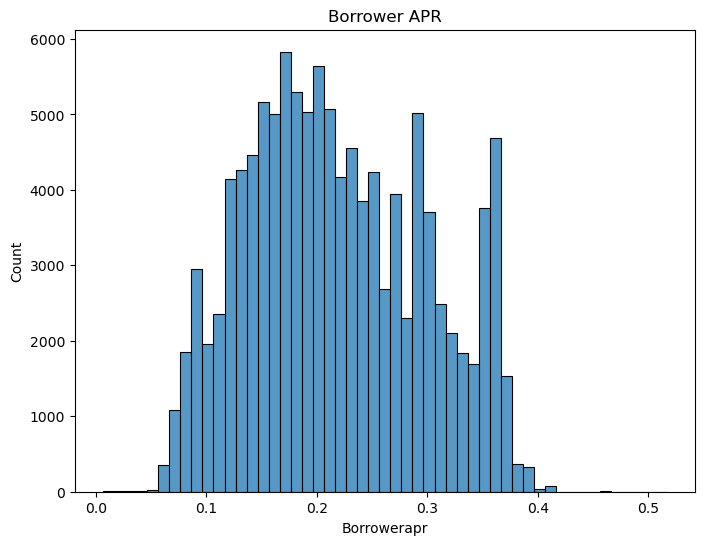

In [26]:
# Plot Borrower APR distribution 

allHistPlots('BorrowerAPR', 0.01, 'Borrower APR')

### Borrower Rate
> - What is the distribution of the borrower rate?

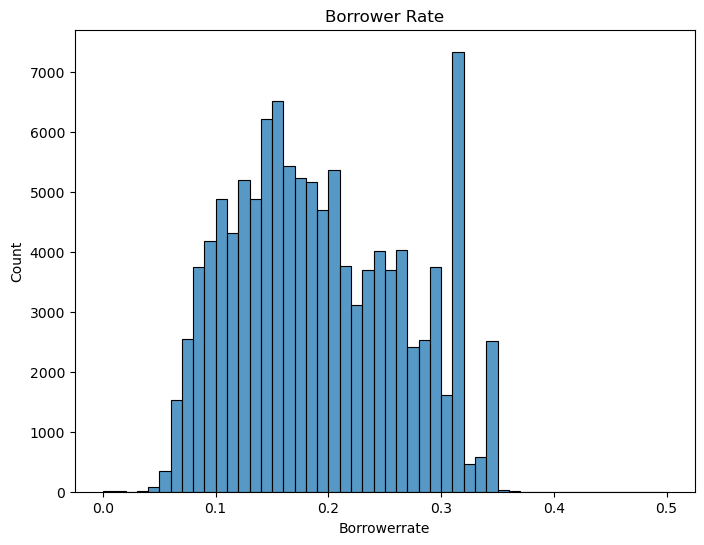

In [27]:
# Plot Borrower APR distribution 

allHistPlots('BorrowerRate', 0.01, 'Borrower Rate')

### Observation 


### StatedMonthlyIncome
> - What is the distribution of the monthly income of people who took loans? 

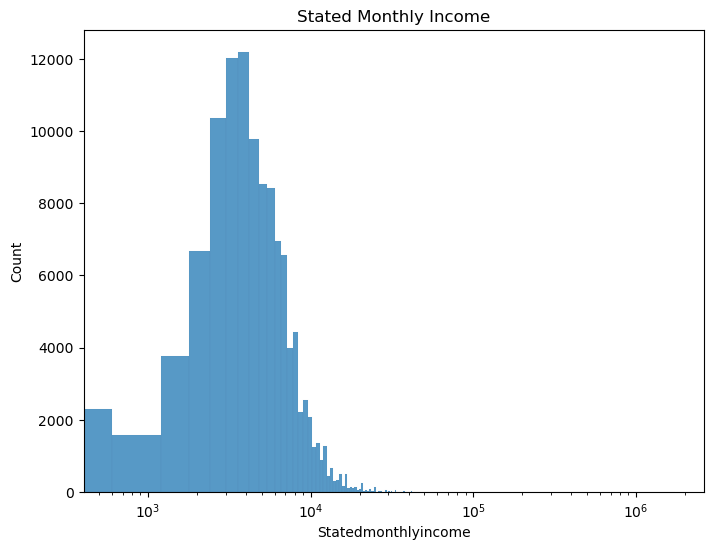

In [28]:
allHistPlots('StatedMonthlyIncome', 600,'Stated Monthly Income')
plt.xscale('log')

### Observation
We can see that the plot is positively skewed hence right skewed.

### Occupation
> - What is the employment distribution for the dataset?

In [29]:
df_loan['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

### Observation
The output shows that there are 67 unique jobs in the dataset. I will plot the first 20 occupations.

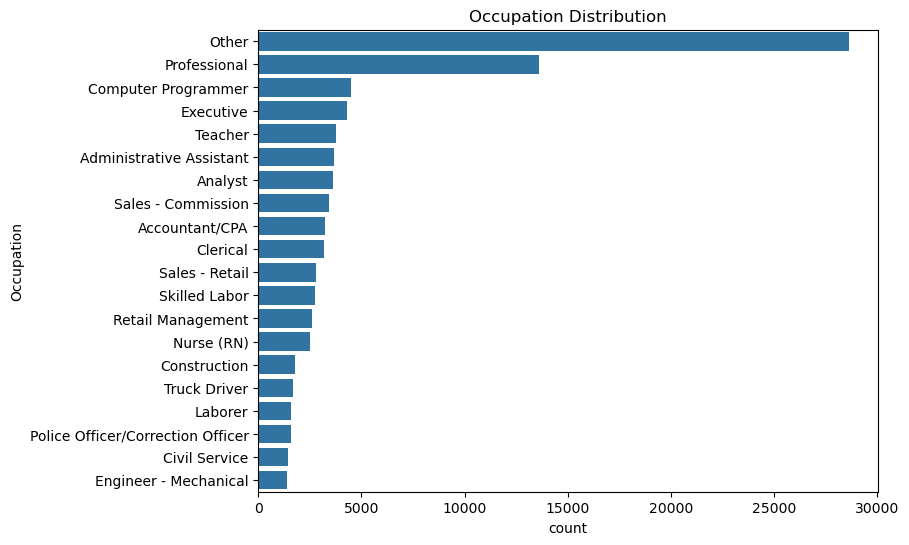

In [30]:
# Plot 

plt.figure(figsize=[8,6])
sb.countplot(data=df_loan, y= 'Occupation', order=df_loan['Occupation'].value_counts().iloc[:20].index, dodge=True, color=base_color)
plt.ylabel('Occupation')
plt.title('Occupation Distribution')
plt.show();

### Observation 
From the figure, we see that majority of the people are listed under other. The top 5 occupation that people take loans are are professional, computer programmer, executive, teacher, and administrative assistant. 

### Employment Status 
> - What are the employment status of people who take loans? 

In [31]:
df_loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

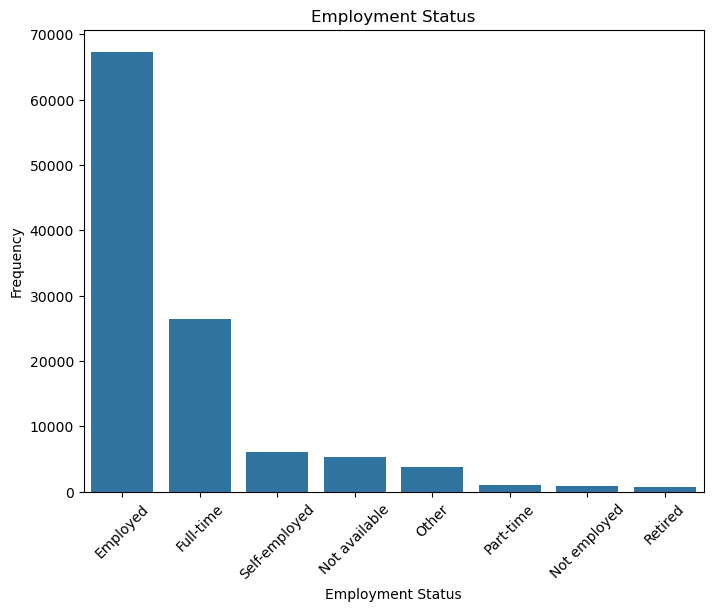

In [32]:
# Plot of Employment status 

order = df_loan['EmploymentStatus'].value_counts().index

plt.figure(figsize=[8,6])
sb.countplot(data=df_loan, x='EmploymentStatus', order=order, color=base_color)
plt.ylabel('Frequency')
plt.xlabel('Employment Status')
plt.title('Employment Status')
plt.xticks(rotation=45)
plt.show();

### Observation 
From the figure, we see that employed people take the most loans. This is followed by full-time and self-employed categories.

### Is Borrower a home owner
> - How many borrowers are homeowners?

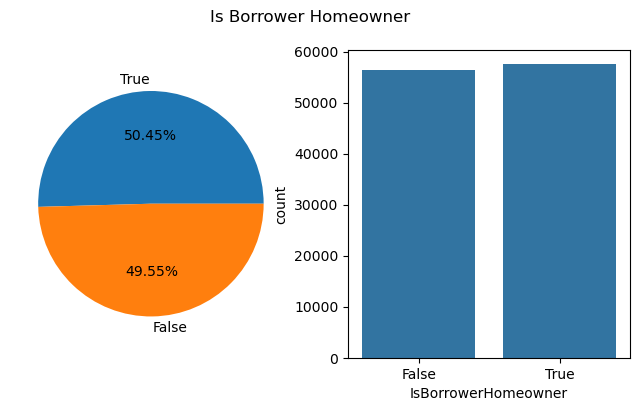

In [33]:
# Plot of IsBorrowerHomeowner feature 

plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
plt.pie(df_loan['IsBorrowerHomeowner'].value_counts(), labels=df_loan['IsBorrowerHomeowner'].value_counts().index, autopct="%.2f%%")

plt.subplot(1,2, 2)
sb.countplot(data=df_loan, x='IsBorrowerHomeowner', color=base_color)

plt.suptitle('Is Borrower Homeowner')
plt.show();

### Observation 
This shows that a bit more people who take loans are home owners 

### CreditGrade
> - What is the highest credit grade?

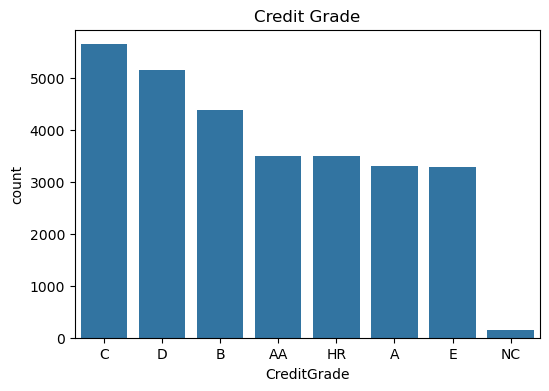

In [34]:
# plot of credit grade distribution

plt.figure(figsize=[6,4])
sb.countplot(data = df_loan, x='CreditGrade', order=df_loan['CreditGrade'].value_counts().index, color=base_color)
plt.xlabel('CreditGrade')
plt.title('Credit Grade')
plt.show();

### Observation
From the figure, the highest credit categories are C, D, B, AA, and HR. The lowest credit grade was NC.

### ListingCategory (numeric) 


In [35]:
df_loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

#### Create a new category called 'ListingCategory' by replacing numeric values with the categories 

In [36]:
listings = {0:'Not Available', 1:'Debt Consolidation',
            2:'Home Improvement',3:'Business', 
            4:'Personal Loan',5:'Student Use',
            6:'Auto',7:'Other',8:'Baby&Adoption',
            9:'Boat',10:'Cosmetic Procedure',
            11:'Engagement Ring',12:'Green Loans',
            13:'Household Expenses', 
            14:'Large Purchases', 15:'Medical/Dental', 
            16:'Motorcycle', 17:'RV', 18:'Taxes', 
            19:'Vacation', 20:'Wedding'}

df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].replace(to_replace=listings)
df_loan['ListingCategory'].value_counts()

/var/folders/kk/h_dsh9cd6_zfypmhhqbpy34h0000gn/T/ipykernel_2615/1911784006.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].replace(to_replace=listings)


Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding                 771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

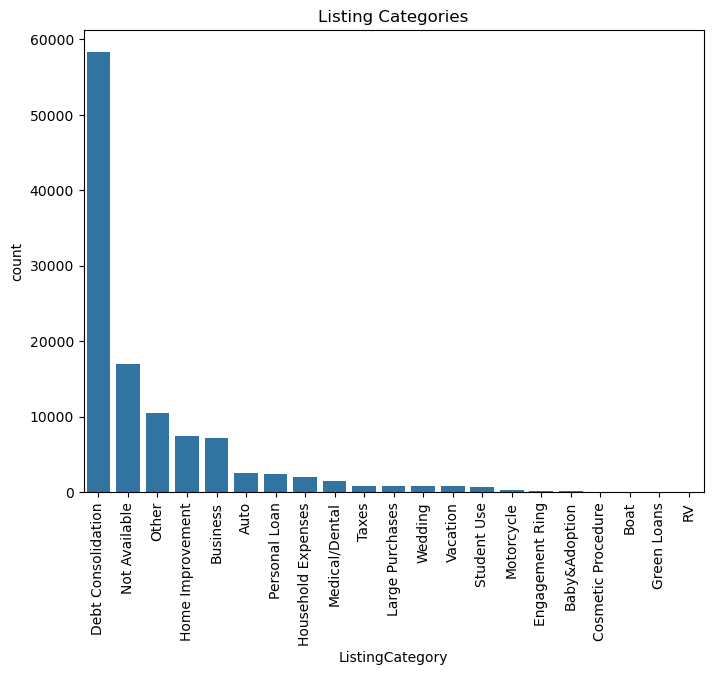

In [37]:
# Plot of listing categories 

plt.figure(figsize=[8,6])
sb.countplot(data=df_loan, x='ListingCategory', order=df_loan['ListingCategory'].value_counts().index, color=base_color)
plt.xticks(rotation=90)
plt.title('Listing Categories')
plt.show();

### Observation 
From the figure, it can be seen that debt consolidation is the main reason why people in the dataset took loans

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After each exploratory plot, the observation from the analysis is summerized below 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some data tiding needed to be performed on the initial dataset to prepare it for visualization
> The ListingCreationDate, was changed to datetype 
> The prosper rating (alpha), loan rating, occupation, and employment status were changed to categorical data 

## Bivariate Exploration

> What is the relationship between the quantitative variables in the dataset?

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:181: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fdb779cac10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


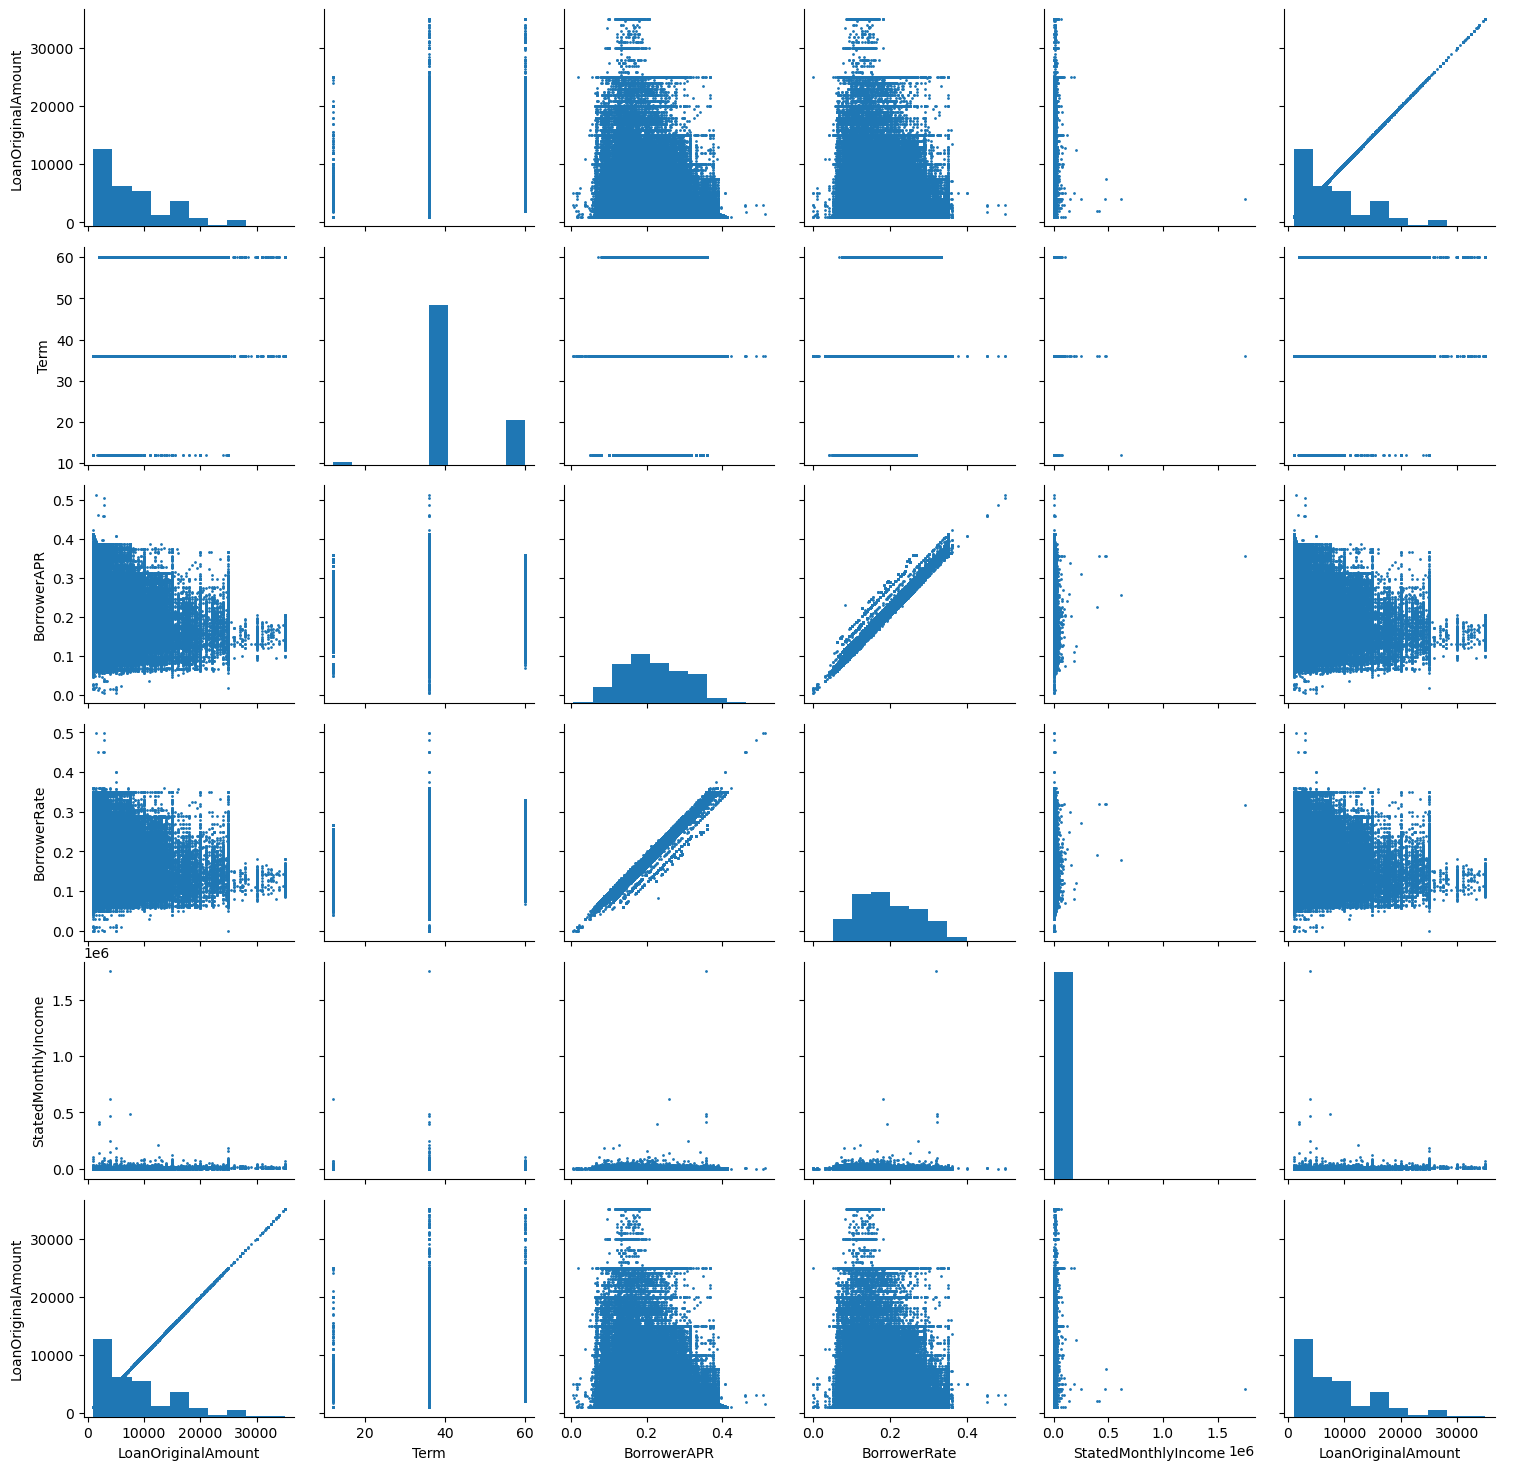

In [38]:
# Grid of plots for Quantitaive variables 

pkm = ['LoanOriginalAmount', 'Term','BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']

g = sb.PairGrid(data=df_loan, vars=pkm)
g = g.map_offdiag(plt.scatter, s=1)
g.map_diag(plt.hist, bins=10)
g.add_legend()

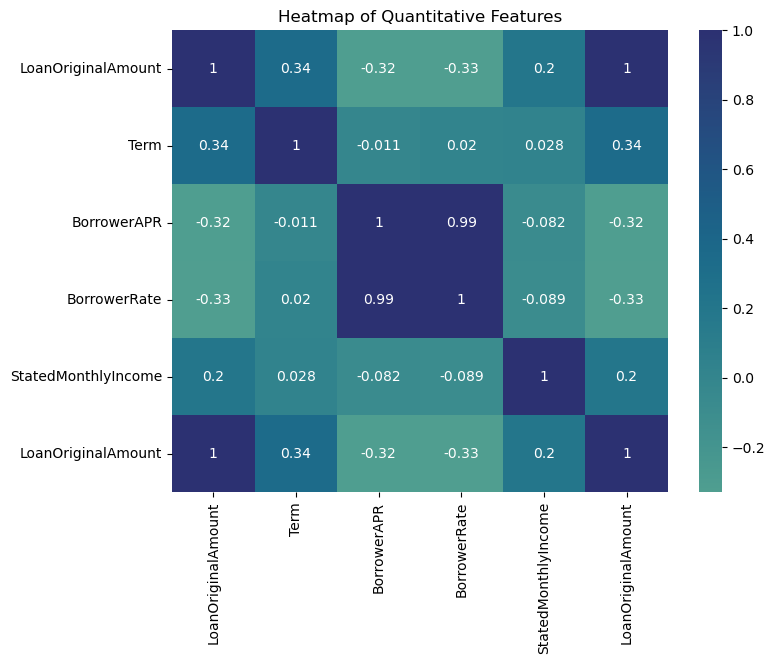

In [39]:
# Heatmap of quantitative variables 

plt.figure(figsize=[8,6])
sb.heatmap(df_loan[pkm].corr(), annot=True, cmap='crest', center=0)
plt.title('Heatmap of Quantitative Features')
plt.show();

### Observation 

- The correlation between BorrowerAPR and BorrowerRate is positively correlated 
- An increase in Borrower APR will lead to corresponding increase in BorrowerRate
- The correlation between BorrowerAPR and loanOriginalAmount is -0.32, the corresponding scatter plot also shows negative correlation
- another interesting visualization is the loanOriginalAmount and StatedMonthlyAmount. An increase in the loanOriginalAmount leads to corresponding increase in statedMonthlyIncome.

> What is the relationship between quantitaive and qualitative variables in the dataset?

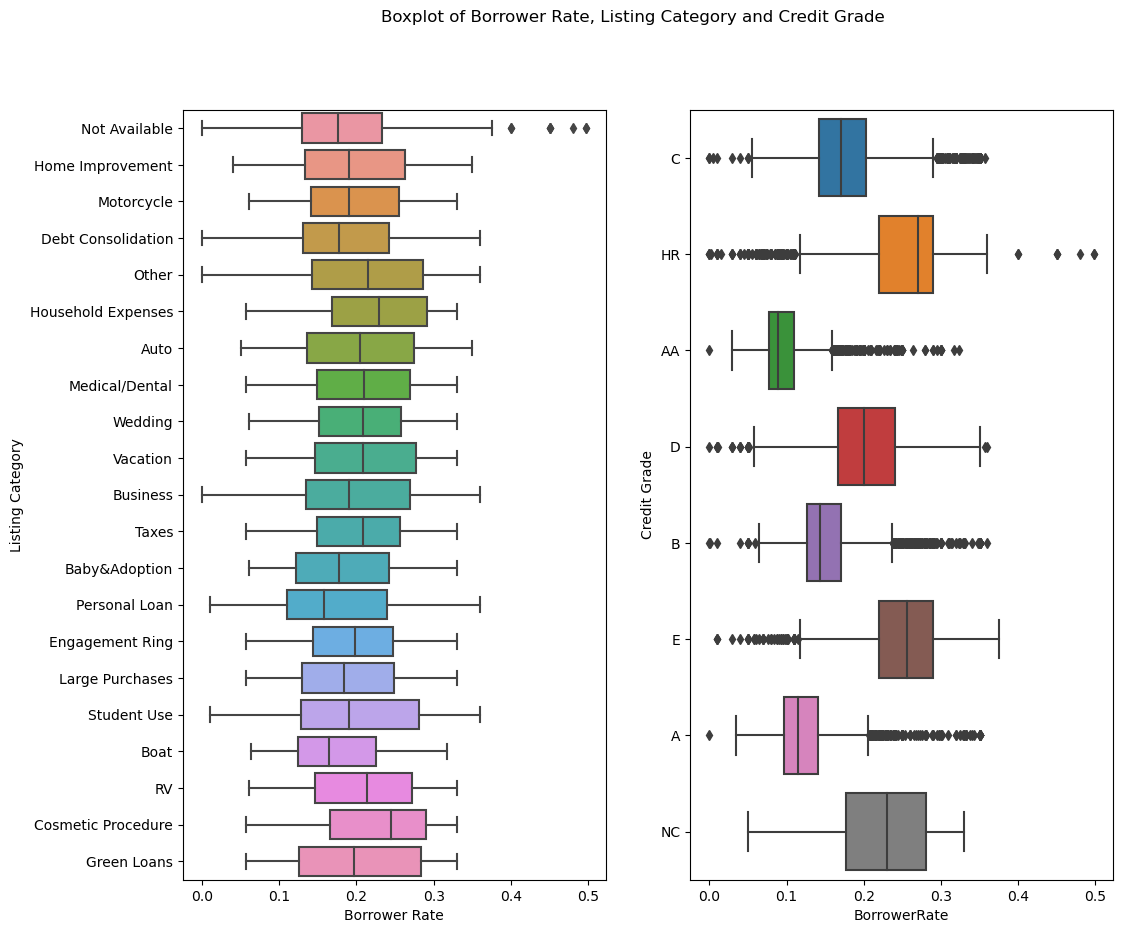

In [52]:
# Plot for qualitative and quantitative features 

plt.figure(figsize=[12,10])
plt.subplot(1, 2, 1)
sb.boxplot(data=df_loan, x='BorrowerRate', y='ListingCategory')
plt.xlabel('Borrower Rate')
plt.ylabel('Listing Category')

plt.subplot(1,2,2)
sb.boxplot(data=df_loan, x='BorrowerRate', y='CreditGrade')
plt.xlabel('BorrowerRate')
plt.ylabel('Credit Grade')

plt.suptitle('Boxplot of Borrower Rate, Listing Category and Credit Grade')
plt.show();

### Observation 
> - The plot shows that cosmetic procedure category has the highest median amongst the listing categories while the personal loan category has the lowest median. 
> - The credit grade HR has the highest median value and AA has the lowest value amongst the borrower rate 

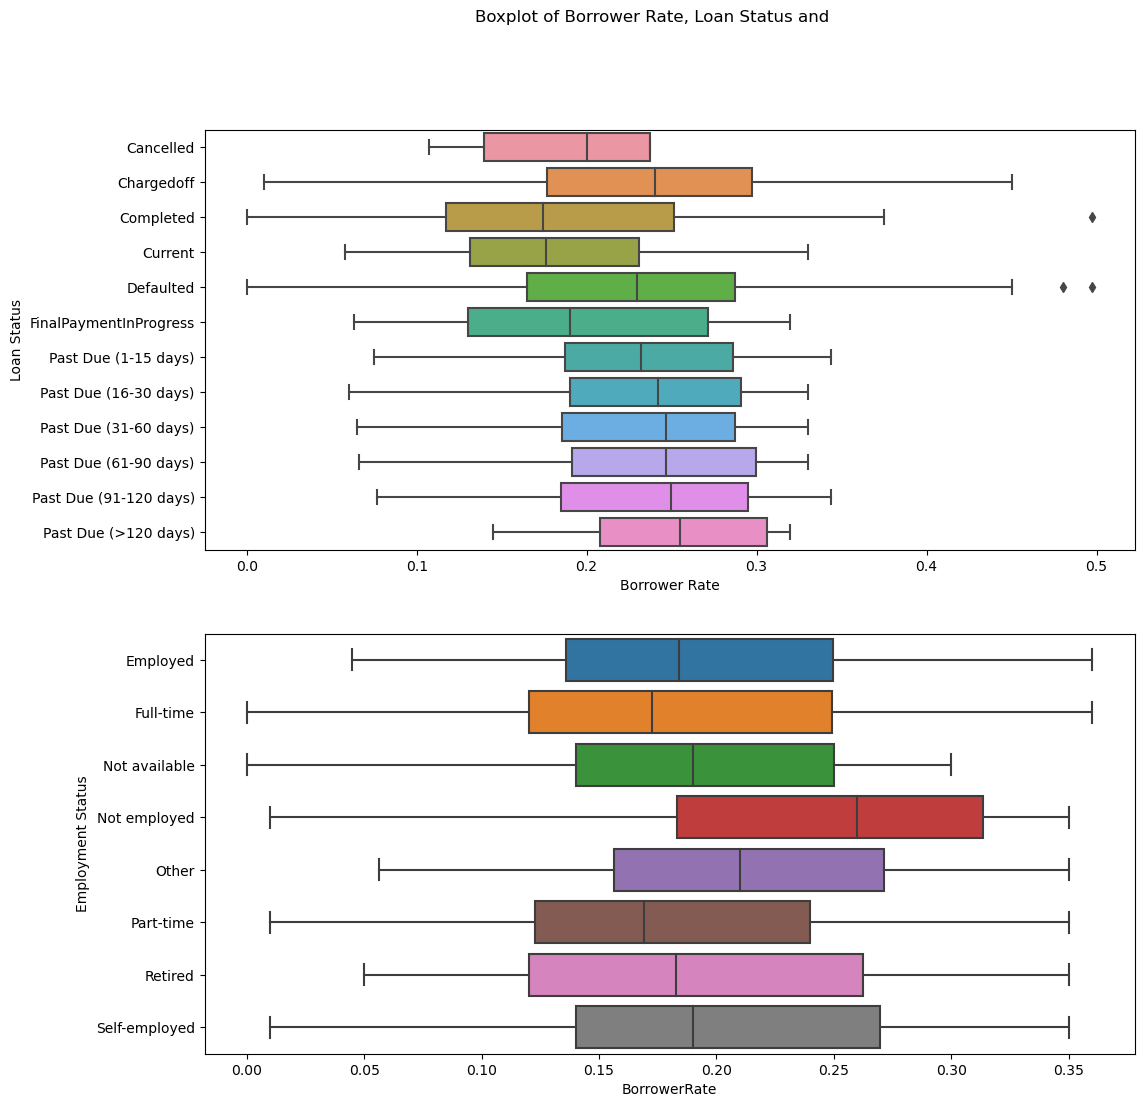

In [53]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
sb.boxplot(data=df_loan, x='BorrowerRate', y='LoanStatus', dodge=True)
plt.xlabel('Borrower Rate')
plt.ylabel('Loan Status')

plt.subplot(2,1,2)
sb.boxplot(data=df_loan, x='BorrowerRate', y='EmploymentStatus', dodge=True)
plt.xlabel('BorrowerRate')
plt.ylabel('Employment Status')

plt.suptitle('Boxplot of Borrower Rate, Loan Status and ')
plt.show();

### Observation
> - The plot shows the completed loan status has the lowest median value and loans past due (>120 days) has the highest median value amongst the borrower rate 
> - Amongst employment status category, Part-time has the lowest median while Not avaliable has highest median amongst borrower rate 

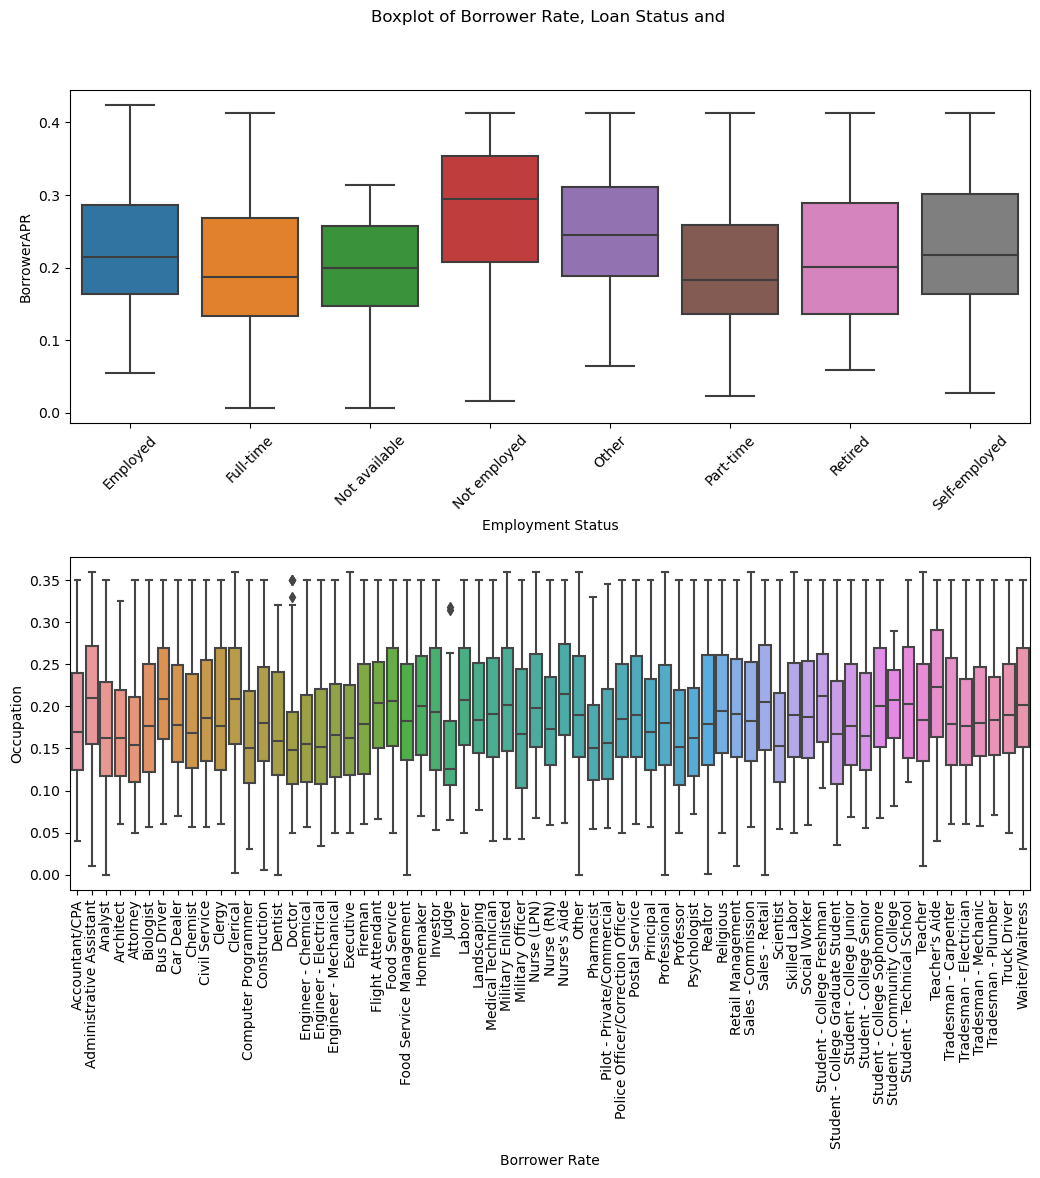

In [54]:
select_occupation = df_loan['Occupation'].value_counts().iloc[:20].index

plt.figure(figsize=[12,10])
plt.subplot(2,1,1)
sb.boxplot(data=df_loan, y='BorrowerAPR', x='EmploymentStatus')
plt.ylabel('BorrowerAPR')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sb.boxplot(data=df_loan, y='BorrowerRate', x='Occupation', dodge=True)
plt.xlabel('Borrower Rate')
plt.ylabel('Occupation')
plt.xticks(rotation=90)

plt.suptitle('Boxplot of Borrower Rate, Loan Status and ')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show();

> - What is the relationship between the qualitative features? 

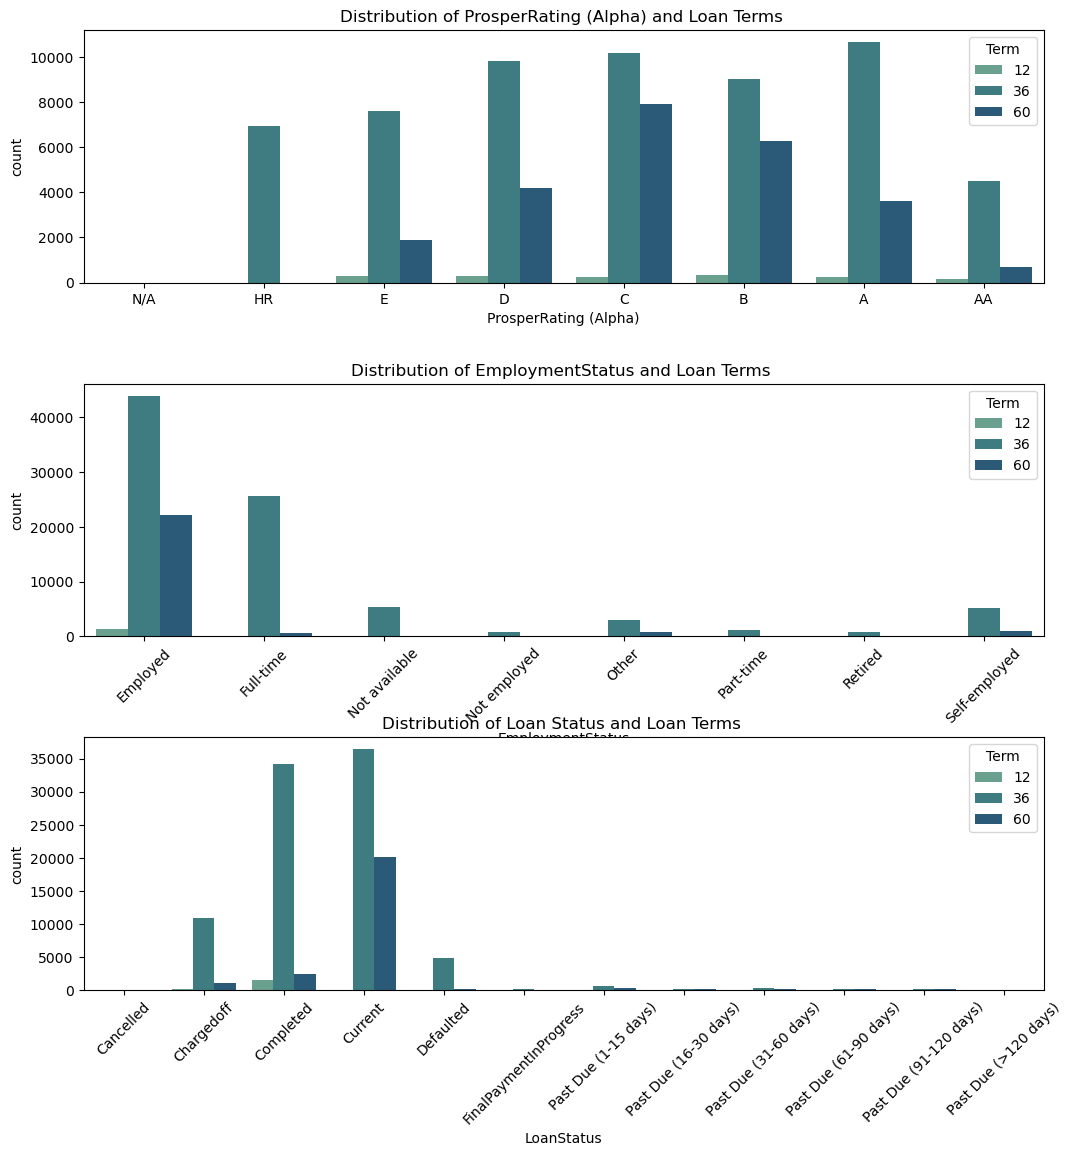

In [55]:
# Plot of qualitative features 

plt.figure(figsize=[12,12])
plt.subplot(3,1,1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'crest')
plt.title('Distribution of ProsperRating (Alpha) and Loan Terms ')
plt.xlabel('ProsperRating (Alpha)')

plt.subplot(3,1,2)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'crest')
plt.title('Distribution of EmploymentStatus and Loan Terms ')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=45)

plt.subplot(3,1,3)
sb.countplot(data = df_loan, x = 'LoanStatus', hue = 'Term', palette = 'crest')
plt.title('Distribution of Loan Status and Loan Terms ')
plt.xlabel('LoanStatus')
plt.xticks(rotation=45)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show();

### Observation 
> - The loan term of 36 months with prosper grade (alpha), A, has the highest number of patrons
> - Loans status, current, and term, 36 months, has the highest number of people taking loans 
> - Employment status, employed, and term, 36 months, has the highest number of patrons 

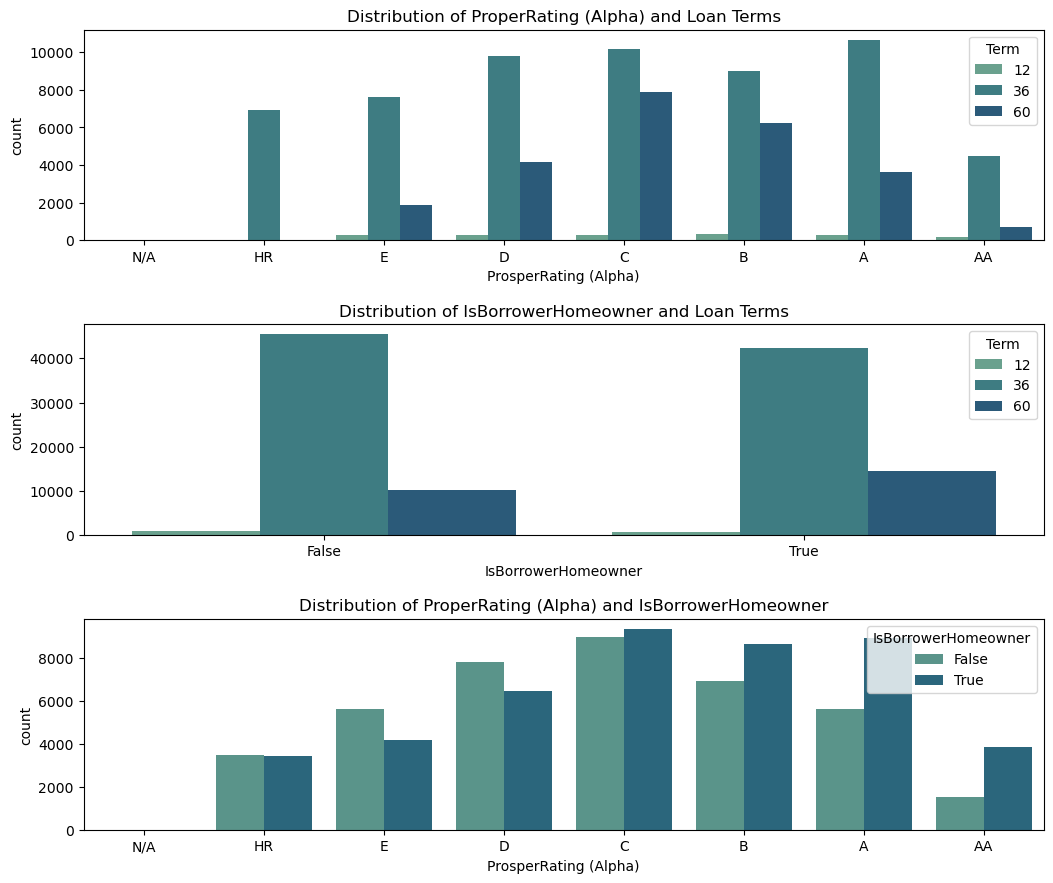

In [56]:
plt.figure(figsize = [12, 10])

plt.subplot(3, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'crest')
plt.title('Distribution of ProperRating (Alpha) and Loan Terms')

plt.subplot(3, 1, 2)
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'crest')
plt.title('Distribution of IsBorrowerHomeowner and Loan Terms')

plt.subplot(3, 1, 3)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner', palette = 'crest')
plt.title('Distribution of ProperRating (Alpha) and IsBorrowerHomeowner')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show();

### Observation
> - From the plot, we can see that loan term, 36 months, and ProsperRate (Alpha) has the highest number of loans
> - There are more people who do not own homes and have loan terms of 36 months than people who own homes and have taken loans 
> - ProsperRating (Alpha) category, C, has the highest number of people who own homes and those who do not own homes 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - From the plots I noticed that the borrower APR and borrower rate were negatively correlated with the loan original amount, which implies the more the loan amount, the lower the APR and rates.
> - From the plots, there exists a strong correlation between borrower APR, borrower rate, monthly loan payment, and loan original amount
> - The unemployed category has the highest median for borrower rate. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> - The not employed category has the highest borrowerAPR
> - The statedMonthlyIncome is negatively correlated with borrowerRate (-0.089) and borrowerAPR (-0.082). This implies that the highest monthly earners takes less loans. 
> - The statedMonthlyIncome is positively correlated with the loanOriginalAmount (0.2). This implies that people earning higher monthly income can take out more loans 
> - Homeonwers take less long term loans (>36) while people who are not homeowners take more long term loans (>36)

## Multivariate Exploration

> - What effect does loan term have on borrower rate and borrower APR?

<Figure size 1000x600 with 0 Axes>

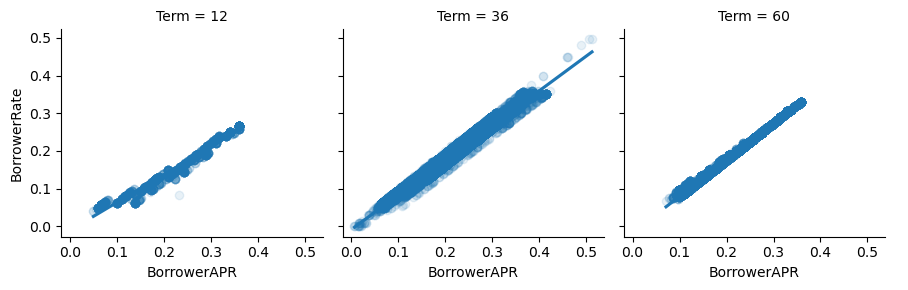

In [57]:
# Plot of loan term on borrowerAPR and borrowerRate

plt.figure(figsize=[10,6])
g = sb.FacetGrid(data = df_loan, col='Term', col_wrap = 3)
g.map(sb.regplot, 'BorrowerAPR', 'BorrowerRate', scatter_kws={'alpha':0.1})
g.add_legend()

plt.show();

> - What effect does being a homeowner have on borrowerRate and borrowerAPR?

<Figure size 1000x600 with 0 Axes>

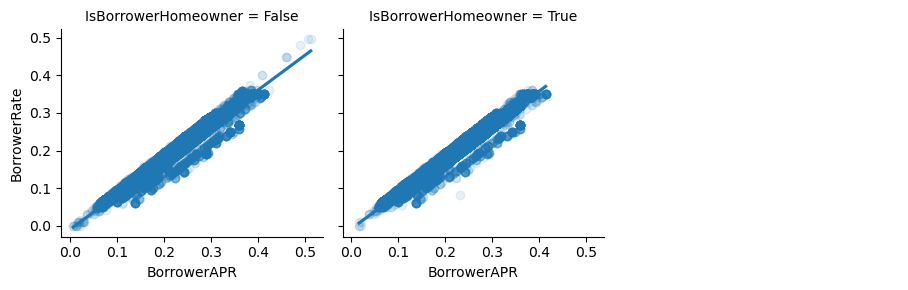

In [58]:
# Plot of loan term on borrowerAPR and borrowerRate

plt.figure(figsize=[10,6])
g = sb.FacetGrid(data = df_loan, col='IsBorrowerHomeowner', col_wrap = 3)
g.map(sb.regplot, 'BorrowerAPR', 'BorrowerRate', scatter_kws={'alpha':0.1})
g.add_legend()

plt.show();

> - Is there a relationship between borrower rate, proper rating (alpha) and loan terms?

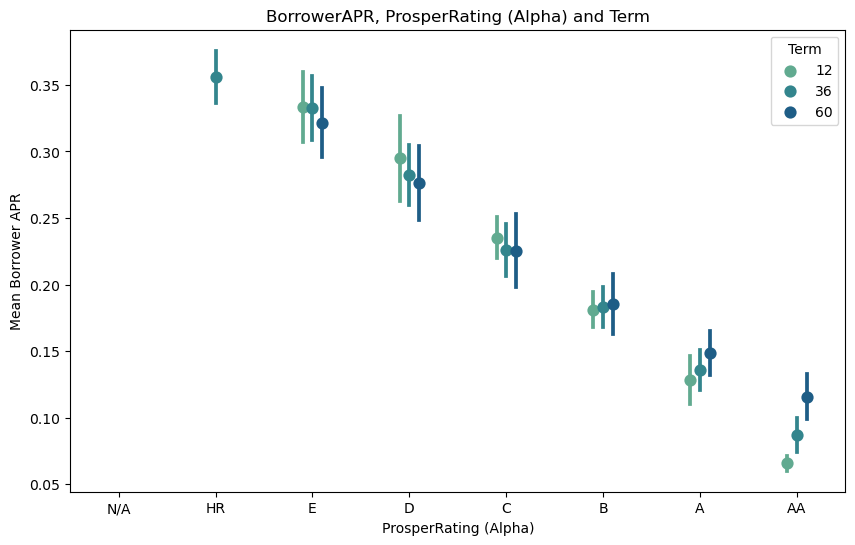

In [59]:
fig = plt.figure(figsize = [10, 6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'crest', linestyles = '', dodge =0.2, errorbar='sd')
plt.title('BorrowerAPR, ProsperRating (Alpha) and Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> - What is relationship between prosperRating, loanOriginalAmount, and borrowerAPR?

In [ ]:
# ProsperRating (Alpha) effect on APR and LoanOriginalAmount 

plt.figure(figsize=[12,8])
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (Alpha)', col_wrap = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'s':2}, line_kws={'color':'red'})
g.add_legend()
plt.suptitle('ProsperRating (Alpha) effect on APR and LoanOriginalAmount', y=1)

plt.show();

> - What is the effect of loanOriginalAmount on borrowerAPR and loanStatus? 

In [ ]:
# LoanOriginalAmount effect on BorrowerAPR and  LoanStatus

plt.figure(figsize=[12,8])
g = sb.FacetGrid(data = df_loan, col = 'LoanStatus', col_wrap = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'s':2}, line_kws={'color':'red'})
g.add_legend()
plt.suptitle('LoanOriginalAmount effect on BorrowerAPR and  LoanStatus', y=1)

plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The borrower Rate increases with higher borrower APR in all loan terms. This mean loan term does not have a significant effect on the borrower APR and Rate 
> - The borrower Rate increases with borrower APR in homeonwers and non homeowners. Being a homeowner or not does not seem to affect the borrower APR and Rate 
> - The borrowerAPR is higher for loan term 12 months with prosperRating (alpha) HR through to C. But this trend changes from prosperRating (Alpha) B through AA with longer loan terms (60 months) being higher 
> - The BorrowerAPR, LoanOriginalAmount are negatively correlated, hence, the higher the loan amount gets the lower the interest rate becomes.
> - The loan amount increases as prosperRating increases
> - The borrower APR is generally low across all ratings  

### Were there any interesting or surprising interactions between features?

> - Borrower APR and loan original amount have a negative correlation. 

## Conclusions

> The initial dataset contains 113,937x81 records. After further assessing the features, 14 features were selected. They include ListingCreationDate, CreditGrade, LoanOriginalAmount, Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperScore, Occupation, EmploymentStatus, IsBorrowerHomeowner, StatedMonthlyIncome, ListingCategory (numeric), and ProsperRating (Alpha). 

> From the univariate data exploration: 
> - 36 month loan term has the highest frequency, StatedMonthlyIncome is right skewed
> - Current loan status is the most frequent LoanStatus 
> - Highest Occupation who take loans are professionals 
> - Employed category borrows more 

> From the bivariate and multivariate exploration: 
> - When loan Term increases we see that that the median loan amount increase significantly from shorter term periods
> - The median BorrowerAPR for part-time employees is the lowest of all the employement
> - There is positive correlation between MonthlyLoanPayment and LoanOriginalAmount
> - There is positive correlation between ProsperScore and ProsperRating (Alpha). 